<a href="https://colab.research.google.com/github/sriabirami2809/abi/blob/main/Maternal_health_risk_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

1.Pandas (pd): For data manipulation and analysis, including handling and transforming data.

2.NumPy (np): For numerical operations and handling arrays and matrices.

3.Matplotlib (plt): For creating static, animated, and interactive visualizations in Python.

4.Seaborn (sns): For statistical data visualization, providing a high-level interface for drawing attractive and informative graphics.

5.Scikit-Learn (sklearn.model_selection.train_test_split): For splitting data into training and testing sets to evaluate model performance.

6.Scikit-Learn (sklearn.preprocessing.StandardScaler): For standardizing features by removing the mean and scaling to unit variance.







In [35]:
df = pd.read_csv('/content/Maternal Health Risk Data Set.csv')

Pandas (pd.read_csv): For reading a CSV file into a DataFrame, allowing for data manipulation and analysis.







In [36]:
import numpy as np

NumPy (np): For numerical operations and handling arrays and matrices.

In [37]:
df.shape

(1014, 7)

df.shape: For retrieving the dimensions of the DataFrame, which provides the number of rows and columns.

In [38]:
df.dtypes

,0
Age,int64
SystolicBP,int64
DiastolicBP,int64
BS,float64
BodyTemp,float64
HeartRate,int64
RiskLevel,object


df.dtypes: For checking the data types of each column in the DataFrame.

In [39]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

df.columns: For retrieving the column names of the DataFrame.

In [40]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


Pandas (df.info()): For providing a concise summary of the DataFrame, including the number of non-null entries, data types, and memory usage.

In [41]:
df. isnull(). sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


Pandas (df.isnull().sum()): For checking the number of missing (null) values in each column of the DataFrame.

In [42]:
df. describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


Pandas (df.describe()): For generating descriptive statistics of the DataFrame, including count, mean, standard deviation, minimum, and maximum values for numeric columns.

In [43]:
df. duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


Pandas (df.duplicated()): For identifying duplicate rows in the DataFrame, returning a Boolean Series where True indicates a duplicate row.

In [44]:
df. head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


Pandas (df.head()): For displaying the first few rows (default is 5) of the DataFrame, useful for a quick overview of the data.

TASK 1 :Data processing

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [46]:
le=LabelEncoder()
for col in df.columns:
  if df[col].dtype=='object':
      df[col]=le.fit_transform(df[col])

In [47]:
df.fillna(df.median(), inplace=True)


In [48]:
df = pd.get_dummies(df, drop_first=True)


Pandas (pd.get_dummies): For converting categorical variable(s) into dummy/indicator variables, with the option to drop the first category to avoid multicollinearity.







In [49]:
print(df.describe())

               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate    RiskLevel  
count  1014.000000  1014.000000  
mean     74.301775     1.063116  
std       8.088702     0.772146  
min       7.000000     0.000000  
25%      70.000000     0.000000  
50%      76.000000     1.000000  
75%      80.000000     2.000000  
max      90.000000     2.000000  


Pandas (df.describe()): For generating and printing descriptive statistics of the DataFrame, including count, mean, standard deviation, minimum, and maximum values for numeric columns.

Exploratory data analysis

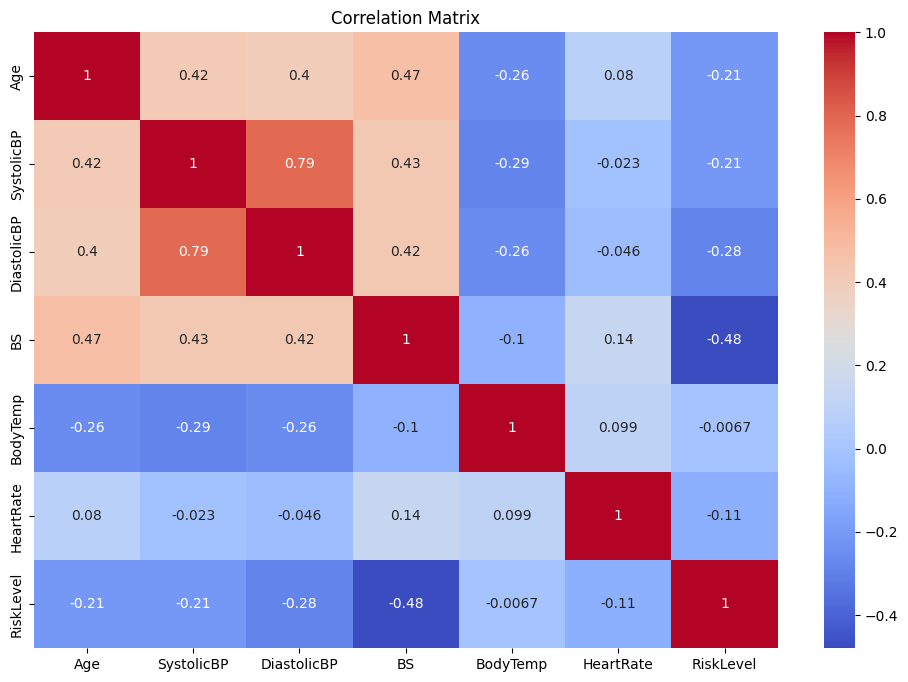

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

1. Matplotlib (plt.figure): For setting the figure size for the plot.
2. Seaborn (sns.heatmap): For creating a heatmap of the correlation matrix, with annotations and a specified color map to visualize correlations between variables.
3. Matplotlib (plt.title): For adding a title to the plot.
4. Matplotlib (plt.show): For displaying the plot.

TASK 2: Feature engineering



Create new features

In [51]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1


In [52]:
df['Cholestrol']=df['BS'].apply(lambda BS: 150+0.5*BS)

In [53]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Cholestrol
0,25,130,80,15.0,98.0,86,0,157.50
1,35,140,90,13.0,98.0,70,0,156.50
2,29,90,70,8.0,100.0,80,0,154.00
3,30,140,85,7.0,98.0,70,0,153.50
4,35,120,60,6.1,98.0,76,1,153.05


standardization of feature scaling

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
df['Maternal_cube']=np.cbrt(df['BS'])

In [56]:
df['Cholestrol'] = df.apply(lambda row: 150 + 0.5 * row['BS'], axis=1)

In [75]:
X.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Cholestrol,Maternal_cube
0,25,130,80,15.0,98.0,86,157.50,2.466212
1,35,140,90,13.0,98.0,70,156.50,2.351335
2,29,90,70,8.0,100.0,80,154.00,2.000000
3,30,140,85,7.0,98.0,70,153.50,1.912931
4,35,120,60,6.1,98.0,76,153.05,1.827160


TASK 3: model building

split the data

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X = df.drop('RiskLevel',axis=1)
y = df['RiskLevel']

In [61]:
X

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Cholestrol,Maternal_cube
0,25,130,80,15.0,98.0,86,157.50,2.466212
1,35,140,90,13.0,98.0,70,156.50,2.351335
2,29,90,70,8.0,100.0,80,154.00,2.000000
3,30,140,85,7.0,98.0,70,153.50,1.912931
4,35,120,60,6.1,98.0,76,153.05,1.827160
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,157.50,2.466212
1010,55,120,90,18.0,98.0,60,159.00,2.620741
1011,35,85,60,19.0,98.0,86,159.50,2.668402
1012,43,120,90,18.0,98.0,70,159.00,2.620741


In [62]:
y

,RiskLevel
0,0
1,0
2,0
3,0
4,1
5,0
6,2
7,0
8,2
9,0


In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

logistic regression model

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lo = LogisticRegression()

In [66]:
lo.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

support vector classifier model

In [67]:
from sklearn.svm import SVC

In [68]:
svm = SVC(kernel = "rbf", random_state = 0, gamma = 0.10, C = 1.0)

In [69]:
svm.fit(X_train,y_train)

SVC(gamma=0.1, random_state=0)

In [70]:
print("Train accuracy:", svm.score(X_train,y_train))
print("Test accuracy:", svm.score(X_test,y_test))

Train accuracy: 0.846262341325811
Test accuracy: 0.7180327868852459


In [71]:
y_pred = svm.predict(X_test)
print(y_pred)

[2 0 0 1 2 2 2 2 2 0 0 1 1 0 2 2 0 1 1 2 2 2 2 0 1 2 0 2 1 1 2 0 1 1 1 0 0
 2 1 0 1 2 0 0 1 2 0 2 1 1 1 1 1 1 2 2 0 1 1 1 1 2 2 2 2 0 2 0 2 2 0 1 1 2
 1 0 1 2 0 1 1 1 1 1 2 1 1 2 0 2 1 0 1 0 2 1 2 1 0 2 1 0 1 1 1 2 1 1 1 2 2
 2 1 0 2 1 1 0 1 0 2 1 1 2 0 0 2 1 2 1 1 1 2 2 1 1 0 2 1 2 0 1 0 0 1 1 0 2
 1 2 1 1 1 2 0 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 0 1 2 2 1 0 2 1 1 1 0 2 1 1 0
 1 0 1 1 1 2 1 2 2 1 1 2 0 1 1 2 2 0 0 2 1 2 0 2 2 0 2 1 1 1 0 2 1 1 1 0 0
 2 1 1 2 2 1 0 1 1 1 2 1 2 2 1 1 2 0 1 1 1 1 2 0 1 1 1 1 0 1 2 1 0 1 1 0 0
 1 1 2 1 1 2 0 2 1 0 2 1 0 1 2 0 1 1 1 1 1 1 0 1 0 2 1 0 1 2 2 1 2 1 1 1 0
 0 1 2 1 0 0 2 0 1]


TASK 4: fine-tune the selected model.

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['liblinear', 'saga']})

In [74]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'C': 0.1, 'solver': 'liblinear'}
Best score: 0.6530516431924883
